## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
#greater_percent = round(n_greater_50k / n_records,3)
greater_percent = n_greater_50k / n_records*100
# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

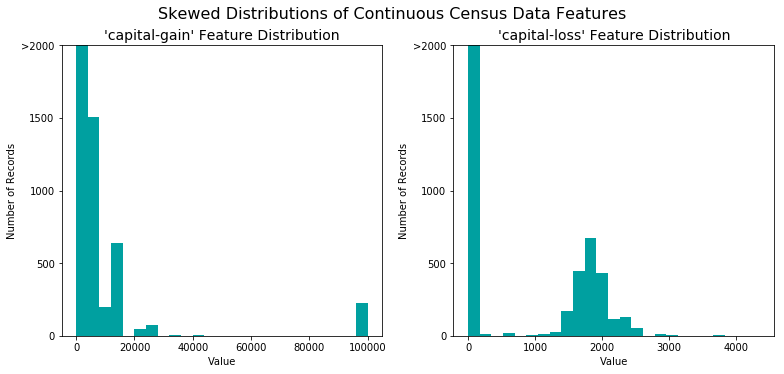

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

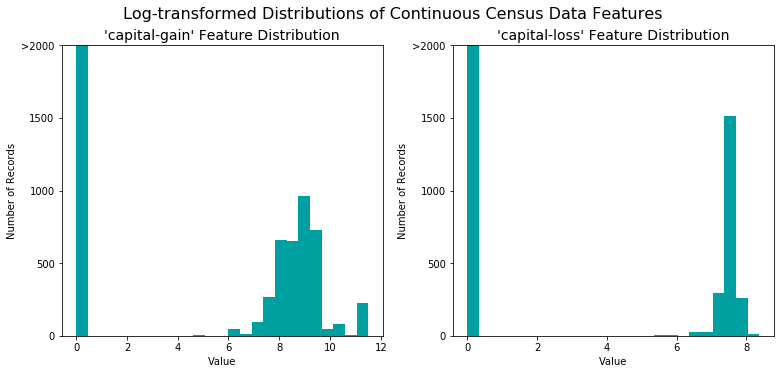

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
# income = income_raw.apply(lambda x: x == '>50K')
income = income_raw.astype('category').cat.codes
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

true_positives = np.sum(income)
false_positives = income.count() - true_positives
true_negatives = 0
false_negatives = 0

# TODO: Calculate accuracy, precision and recall
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Acc: ',accuracy)
# [True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives]

recall = true_positives / ( true_positives + false_negatives)
print('Recall: ',recall)
# [True Positives/(True Positives + False Negatives)]

precision = true_positives / ( true_positives + false_positives)
print('Precision: ',precision)
# [True Positives/(True Positives + False Positives)]

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + (0.5*0.5)) * ((precision * recall) / (((0.5*0.5) * precision) + recall))
# (1+ B^(2))*((Precision * Recall) / ((B^(2) * Precision) + Recall)))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Acc:  0.247843969749
Recall:  1.0
Precision:  0.247843969749
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**_Python 3 used for implementation of this Notebook_**

### Models chosen for contrasting performance:

1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbors (KNeighbors)


**Model 1: Logistic Regression**

**_Describe one real-world application in industry where the model can be applied_**

Logistic Regression (LogR) is arguably one of the most commonly used classification techniques, either as a simple yet elegant stand alone model or a "base" model used to compare results against various other modelling techniques. Due to the fact that LogR directly models the probability of an event (Y=1) given some inputs X, it is often well suited to problems that represent some form of risk modelling or the probability of an event occouring, conditional on the model inputs. Given its composition, LogR was (and still is) commonplace in risk departments in Banking and the Insurance industry.

For example, say a small bank were facing issues with bad debts and/or liquidity. It would be very important for the bank to understand their controllable risk by estimating the probability of their clients defaulting on existing loans. Such a problem could be modelled by looking at available inputs from previous customers who have defaulted on loan payments and those who have not defaulted ( binary Y: 0 = not default, 1 = default). Our feature space X would then consist of customer data such as age, occupation, number of loan payments, length of time as customer, salary and so on. Constructing our model successfully (training and testing on previous data allowing room for generalisation) can then provide predictions for future data, specifically what is the conditional probability of default given what we know about the customer already (Y|X) - Default given age, occupation, salary etc..

**_What are the strengths of the model; when does it perform well?_**

- LogR can often provide more expansive information about feature importance. For example, the model coefficients not only indicate how important a variable was to model performance (size of the coefficient), but also indicate the direction of how the variables effects the relationship with the target (positive or negative coefficients).
- LogR is capable of interpreting interactions and power terms. For example the model can consist of mutiplicative terms, polynomials of varying degrees and interaction terms.
- LogR is more robust to the strict linear/normality assumptions of other statistical models. I.e. input variables are not assumed to be normally distributed and neither are error terms.
- Generally LogR perfroms better when linear relationships are preserved in the input variables to determine a binary outcome variable.
- LogR can make use of regularisation to combat against overfitting, for example being used in conjuction with LASSO regression.
- For an experienced analyst, the probabalistic outputs can serve as a nice interpretation, when understanding the transformations at play between odds and probabilities ( the model using a sigmoid function and the application of inverse logit on the coefficients).

**_What are the weaknesses of the model; when does it perform poorly?_**

- The primary assumption of logistic regression is that Y is truly binary. Performing more like a risk indicator than a true classifier, LogR does not perform well for multi class problems.
- As LogR uses a linear decision space, it does not deal appropriately well with binary variables. Further more to this point, although it can attempt to deal with non-linear relationships, it is better suited to dealing with linear boundaries.
- You need to explicitly call out which interaction terms you wish to include in the LogR model prior to creating the model. This assumes a great understanding of the feature space available prior to using the technique.
- Accuracy metric can be "inflated" if using LogR when there is a class imbalance in the target variable.

**_What makes this model a good candidate for the problem, given what you know about the data?_**

Given that this is a binary classification problem LogR is well suited for such a problem. The data has been preprocessed and cleaned, hence the model can be applied immediately without worrying about missing values or the need for imputation. Furthermore, since the data has been normalised and transformed in areas to avoid kurtosis we can take advantage of this and better define the function of best fit. In addition, the attributes available in the dataset have some overlap with data collected for previously successful models in the Financial industry to predict an outcome which holds some similarities with that of loan default or credit scoring; each relates to an estimation about people's relationship to some monetary value. Finally, the model coefficients and direction for both variable importance and class assignment are extemely useful as probability estimates when interpreted correctly and go beyond a standard correct or incorrect labelling.

**References:**
- https://www.quora.com/What-are-real-life-applications-of-logistic-regression
- https://www.quora.com/What-are-the-advantages-of-logistic-regression
- http://ucanalytics.com/blogs/case-study-example-banking-logistic-regression-3/
- https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4
- https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
- https://stats.stackexchange.com/questions/333071/logistic-regression-coefficients-in-real-life
- https://stats.stackexchange.com/questions/198067/when-is-logistic-regression-suitable

**Model 2: Random Forest**

**_Describe one real-world application in industry where the model can be applied_**

Random Forest (RF) Models have widespread applications accross a number of various industries. Their popularity is down to their versatility in how they can accept various forms of input data and the inherent simplicity of what is essentially a random ensemble of tree based decision models make it easier to translate to wider non-technical audiences. There have been some very successful applications of RF Models in bioinformatics and early disease detection. For example in a recent paper in 2014 a Random Forest classifier was used to measure the risk of Diabetic retinopathy (DR) in patients, which is one of the leading causes of blindness in the United States and world-wide. DR is a silent disease that may go unnoticed until it is too late for effective treatment. Therefore, early detection could improve the chances of therapeutic interventions that would alleviate its effects.

The research team from the afforementioned paper collected patinet data from a 3443 ACCORD-Eye Study used to estimate Random Forest (RF) and logistic regression classifiers. The team experimented with the possibility of using RF generated class conditional probabilities as metrics describing early warning indicators of DR risk. Given its intuitive variable importance "voting selection" measures of variable importance were used to detect factors that affect classification performance. The variable importance determined by RF can often be used as a streamlining process for feature selection when using alternative classifiers in similar applications.

**_What are the strengths of the model; when does it perform well?_**

- By averaging a multitude of randomly sampled trees constrcuted of random feature sets, RF reduces the possibility of model over fitting.
- Similar to above, by using multiple trees, you reduce the amount of variance in the model and hence should improve the ability to generalise well to test sets and new predicitons.
- The feature importance generation is extremely useful for understanding relationships in the data and contributory factors impact on the model. Furthermore this subset can often improve model performance.
- Random Forest has built in capability to handle missing data.
- The data does not require much preparation as outlined above and does not require scaling.
- Out of Bag testing on the model is essentially a free testing set for model performance.

**_What are the weaknesses of the model; when does it perform poorly?_**

- Random Forest models do not deal well with categorical variables that contain many levels and generally show bias towards these attributes. As such feature importance can be falsely skewed towards such variables.
- Random Forests can be complex to understand and computationally expensive to train and predict on large datasets. It is possible in certain packages to print the "optimal" splits and nodes that form a sample tree, however it is difficult to truly understand how the algorithm came to such a conclusion.
- Being resource intensive to train and predict, tuning hyperparameters often takes a lot of patience and there is a lot of variability in parameter selection to perform grid search on for example.
- Random Forest generally does not perform well when class imbalance is present or for problems where anomaly detection is the goal.

**_What makes this model a good candidate for the problem, given what you know about the data?_**
Given that we have just under 50k observations of labelled data we are already confined to supervised learning algorithms to best solve our classification problem. Without any prior knowledge of the distribution and nature of each variable I have chosen random forest as a robust algorithm that is well suited to dealing with both linear and non-linear variables. Furthermore, random forest generally presents a high degree of accuracy when constructed as an "off the shelf" implementation i.e. not yet tuned. I also feel that the variable importance provided by RF is a valuable insight in its own right. Not only can this algorithm answer the classification problem of "who" but it can provide some additional information as to the "what" and/or "why" behind the most influential factors. A note of caution: due to the large number of categorical variables, some having a large set of levels, one must be careful when understanding a potentially skewed variable importance plot. However as a first implementation prior to tuning I am most interested in the model's performance compared to the other models.

**References:**
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4062420/
- https://www.researchgate.net/publication/259543750_Mining_data_with_random_forests_Current_options_for_real-world_applications
- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
- https://www.quora.com/What-are-some-advantages-of-using-a-random-forest-over-a-decision-tree-given-that-a-decision-tree-is-simpler
- https://stats.stackexchange.com/questions/365437/what-are-advantages-of-random-forests-vs-using-bagging-with-other-classifiers
- https://www.datasciencecentral.com/profiles/blogs/random-forests-algorithm
- https://stats.stackexchange.com/questions/187200/how-are-random-forests-not-sensitive-to-outliers
- https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm
- https://www.quora.com/What-are-the-disadvantages-of-a-random-forest-algorithm
- https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/19273/1523538731/ml_map.png
- https://www.quora.com/How-do-you-choose-a-machine-learning-algorithm
- https://semanti.ca/blog/?the-most-important-machine-learning-algorithms

**Model 3: K Nearest Neighbours (KNN)**

**_Describe one real-world application in industry where the model can be applied_**

K Nearest Neighbours (KNN) is often used as a non-parametric supervised learning technique for clustering of customer behaviour or species habitation patterns in varying ecosystems. The KNN classification technique is a refreshing and intuitive method of classifying data based on its proximity to other observations in N-dimensional space. 

A recent research paper decribes how the k-Nearest Neighbor classification method can be applied for economic forecasting. The paper proposes that by expressing financial distress as a function of various financial ratios, one can predict a financial institution's liklihood of bankrupty given the similarity in its composition and financial performance to corporations who have previously declared bakruptcy.

**_What are the strengths of the model; when does it perform well?_**

- KNN is an intuitively simple algorithm as it bases it's error function on distance between points within a neighbourhood.
- KNN can easily be visualised when expressed in lower dimensions or used in conjunction with self organising maps.
- KNN is non parametric and hence does not assume that the data will follow any underlying theoretical assumptions. This is particulalry useful for "real world" data which contains many kinds of nuances and irregularities.
- KNN works well on low dimensional data.

**_What are the weaknesses of the model; when does it perform poorly?_**

- KNN is a lazy learner, meaning it doesn't learn anything from the training data and simply tries to fit new predictions in among the previous data to understand its similarity to previous points.
- As per above, this also means that similarity metrics need to be calaculated from scratch for each new prediction record. This can be extremely time consuming with the fear that the model may also not generalise well.
- KNN is highly sensitive to erroneous data or the scale of particular features. Irrelevant features or outliers can hugely distort how distance metrics perform, particularly for boundary points between classes

**_What makes this model a good candidate for the problem, given what you know about the data?_**
Following the decision flow map provided by Scikit learn algorithm cheat sheet, best practice when working with a labelled data set attempting to predict a category that does not include text data is to jump straight to KNN. KNN is a simple algorithm both to understand and to train which will serve as a good baseline in comparison to the other models chosen. As our data has been scaled for the most part we shouldn't have to worry about erroneously represented distances between observations. There are also no assumptions made about the composition of our data so we can launch straight into training with minimal data preparation.


**References:**
- https://www.ijera.com/papers/Vol3_issue5/DI35605610.pdf
- https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#parameter-tuning-with-cross-validation
- https://www.quora.com/What-is-the-k-Nearest-Neighbour-algorithm-What-type-of-problems-can-be-solved-by-this-algorithm-What-type-of-math-is-required
- http://www.nickgillian.com/wiki/pmwiki.php/GRT/KNN#Advantages
- https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7
- https://stats.stackexchange.com/questions/44518/for-what-type-of-problems-nearest-neighbor-performs-better
- https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/19273/1523538731/ml_map.png
- https://www.quora.com/How-do-you-choose-a-machine-learning-algorithm
- https://semanti.ca/blog/?the-most-important-machine-learning-algorithms

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics  import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X = X_train[:sample_size], y = y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X = X_test)
    predictions_train = learner.predict(X = X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_true = y_train[:300], y_pred = predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_true = y_test, y_pred = predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_true = y_train[:300], y_pred = predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_true = y_test, y_pred = predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


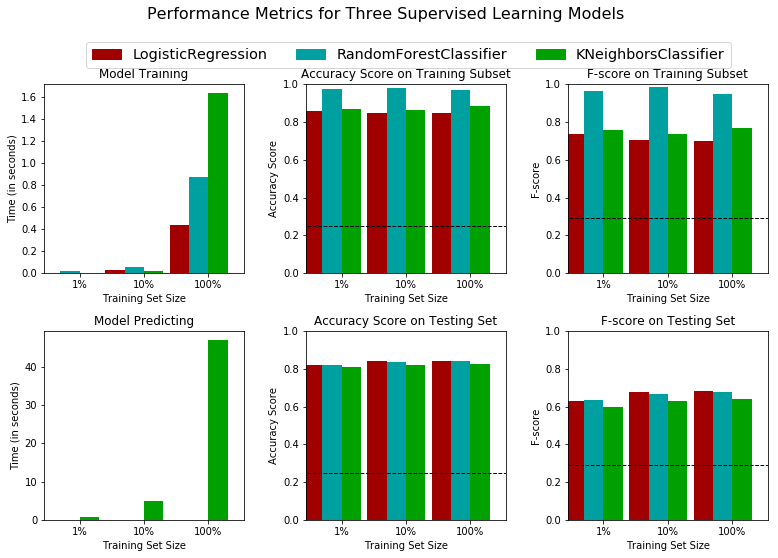

In [10]:
# TODO: Import the three supervised learning models from sklearn
# Gaussian Naive Bayes (GaussianNB)
# Decision Trees
# Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
# K-Nearest Neighbors (KNeighbors)
# Stochastic Gradient Descent Classifier (SGDC)
# Support Vector Machines (SVM)
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state = 55)
clf_B = RandomForestClassifier(random_state = 55)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**_F Score vs Accuracy? Model evaluation and understanding our performance metrics_**

From the graphical representation of the model performance above it appears as though Logistic Regression has the highest F Score when 100% of the training data is used. Although originally the weakest model when comparing the training subset holdout to evaluate model performance, Logistic Regression appears to generalise better than Random Forest and KNN when a large amount of testing data is used. Furthermore, Logistic Regression increasingly performs better the more training data that is used to construct the model, suggesting it will scale well and stablise model drift longer than the competing techniques.

Logistic Regression also holds the highest accuracy for 1%, 10% and 100% of the training set sample sizes which means it performs the best when purely trying to label an observations as +/- 50,000. However, we are less concerned with accuracy for this example as sensitivity (true positive rate or how good the model is at identifying positives, penailsed for falsely labelling positives as negatives) and precision (positive prediction power or how good the model is at identifying positives, penalised for falsely identifying negatives as positives) play a much larger role in deciding whether or not to contact a candidate at all, and in the event they are contacted maximise their donation. In addition, there is just below 25 percent of our dataset who actually make above $50,000, meaning accuracy will more than likely be skewed.

This is why the F score should be considered as the ultimate judge of model performance as by nature of it's calculation it balances the effects of precision and recall (harmonic mean):

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

**To further elaborate:**

**_Precision_** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**_Recall(sensitivity)_** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

**_Prediciton and Training Time: Which of our models is the most efficient with computing resources?_**

With regards to efficiency in training the model, Logistic Regression is by far the quickest model to build. The same holds true for making predictions, with Logistic Regression and Random Forests performing much quicker than K Nearest Neighbours. Interestingly it seems as the more data we provide for the Random Forest algorithm it begins to improve its accuracy at such a rate that it appears to be catching up with the performance of the Logistic Regression model as is evident from the increase in F score from 1 percent to 10 percent and 100 percent. At this moment in time it would make sense to bring the Logistic Regression model into production, however it would be worth monitoring F score performance if more data is collected and added to the model for the Random Forest and Logistic Regression. That said, potential improvements in F score for the Random Forest will come with the trade off of increased time to train the model which is considerably slower than Logistic Regression and will only be amplied with more data available.

**_Algorithim Suitablility: Which of our models is most suited to our data?_**

Logistic Regression appears to be the most suited to our data based purely off its accuracy and F score performance, with Random Forest in a very close second place. Both LogR and RF are more robust to the strict linear/normality assumptions of other statistical models. Given that this is a binary classification problem LogR is well suited for such a problem since the data has been normalised and transformed in areas. I have a suspicion that the categorical variables with high levels such as `native_country` and `occupation` may have had an influence on the random forest performance with a lower number of samples. Given our current position I will support that Logistic Regression is the most suited to our data, however once more samples have been collected in the future, Random Forest may well take the top spot.


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Describing the model: A Recap on the Initial Objective**

Logistic regression measures the relationship between a target variable, generally binary classes (one of two options), and one or more characteristics we have about each of the data points belonging to the classes by estimating probabilities using a logistic function which nicely converts log odds into probabilities.

Let's consider a model with two predictors, age and occupation. Logistic regression uses these input variables to construct an equation based on their relationship to income (target) by creating a splitting boundary which seperates how age and occupation differ for <50K and >50K. Each input variable is given a coefficient or weight which is applied to the values we provide for each individual, shaping the splitting boundary and giving back the log odds of that individual belonging to the income >50K side of the fence the or <50K side. The coefficients can be positive or negative and their value/size varies on how important the variable is to predicting the log odds of class ownership. Log odds here as a probability are simply odds / (odds + 1), however logistic regression has a built in logistic function that converts these odds into probabilities. What we are left with is a nice equation which eloquently captures each characetristic of our data added together with their appopriate weightings to establish the probability that an individual belong to a given class. Making predictions with a logistic regression model is as simple as plugging in numbers into the logistic regression equation, multiplied by each weight and calculating a result.

For CharityML we will use a supervised algorithm to accurately model individuals' income using data collected from the 1994 U.S. Census. The goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.

Given the data we have collected and collated from various public sources about the general population, along with actual labelled data for those which we already know earn above or below $50,000, we can conduct an experiment on past data to see of what degree of accuracy can we can infer an individuals income which is currently unknown. To train our model we first split our exisiting labelled data (data of individual's for whom their income is known) into training and test. Generally we provide the model with a larger amount of training data (approx 70%) to allow it to understand how all of the attributes we have collected are related to a persons income. More specifically, we wish to know how age, occupation, education (etc.) combined relate to and differ for indivudals who earn below or above 50,000.

Once we have fed all of this information into our model allowing it to "learn" the difference between income for each individual we can then conduct our testing to see exactly how accurate our model is. For our test data set of individuals for whom we know their income, we remove this attribute so we no longer know who belongs to which class (below 50k - 0 or 50k+ - 1). The model then essentially simulates predictions on what it belives to be entirely new data. The model will return back a label for each record in the training set of either below 50K or above 50K. Meanwhile, we know what the true class of each observation is and can grade the model based on how many of the test set it actually got right. Now we have a proxy evaluation on how a model would perform if we were to provide it with entirely new individuals for whom we do not know their income. Assuming that the data we collect in the future is closely similar to the data we have trained our model on, for any entirely new individual our model will have approximately an 85 percent accuracy in determining whether that individual's income is above or below 50,000.

**References:**
- https://machinelearningmastery.com/train-final-machine-learning-model/
- https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
- https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets
- https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data
- https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- http://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/
- https://en.wikipedia.org/wiki/Logistic_regression

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8422
Final F-score on the testing data: 0.6843

Best Model
------
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=55, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

Unoptimised Model
------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=55, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Optimised Model Confusion Matrix
------
[[6309  531]
 [ 896 1309]]

Unoptimised Model Confusion Matrix
------
[[6301  539]
 [ 891 1314]]


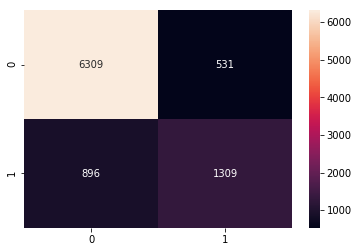

In [13]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import seaborn as sns

# TODO: Initialize the classifier
clf = LogisticRegression(random_state = 55)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'fit_intercept': (True,False)}

#tol : float, default: 1e-4
#Tolerance for stopping criteria.
#'tol':[0.0001,0.001,0.01] 

#C : float, default: 1.0
#Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

#fit_intercept : bool, default: True
#Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest Model\n------")
print(best_clf)
print("\nUnoptimised Model\n------")
print(clf)
print("\nOptimised Model Confusion Matrix\n------")
%matplotlib inline
pred_best = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred_best), annot = True, fmt = '')
print(confusion_matrix(y_test, pred_best))

print("\nUnoptimised Model Confusion Matrix\n------")
#%matplotlib inline
pred = clf.predict(X_test)
#sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')
print(confusion_matrix(y_test, pred))

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.8419        |    0.8422       |
| F-score        |     0.6832        |    0.6843       |


**_What is your optimized model's accuracy and F-score on the testing data?_**

As seen from the table above the Unoptimised Model has an Accuracy Score of 0.8419 and an F-score of 0.6832
While the Optimised Model has an Accuracy Score of 0.8422 and an F-Score of 0.6843.

**_Are these scores better or worse than the unoptimized model?_**

The Optimised Model produces a marginally better Accuracy Score of 0.8422 which is an improvement of 0.0003.
Similarly for the F-Score the Optimised Model shows a minute improvement of 0.0011 in comparison to the Unoptimised Model. In terms of raw predictions there is an interesting trade off observed between the optimised model and the unoptimised model. The optimised model correctly predicted 7618 of 9045 observations, whereas the unoptimised model recorded 7615 correct labels out of 9045. Although the Optimised model does boast a minute boost in accuracy this comes with a lower true positive rate (1309 vs 1314). Our improved accuracy tips the model slightly in favour of correctly predicting true negatives. Given the purpose of the model it may be worth investigating class weighting to focus more on correctly identifying true positives.  

**_How do the results from your optimized model compare to the naive predictor benchmarks you found earlier_**

The Optimised Model shows a major improvement upon the initial naive predictor as outlined by the table below:

|     Metric     | Naive Predictor   | Optimized Model |    Difference   | 
| :------------: | :---------------: | :-------------: | :-------------: |
| Accuracy Score |     0.2478        |    0.8422       |     0.5944      |
| F-score        |     0.2917        |    0.6843       |     0.3926      |

Of the parameters tuned I would suspect `parameter C` has the biggest influence on performance improvement.
`Parameter C` is the inverse of regularization strength, smaller values specify stronger regularization starting at the default of 1 for the Unoptimised Model. As we can see in the comparison from the best model to the original model, C has been optimised from 1.0 down to 0.2. Stronger regularisation strength here would combat against any potential overfitting exhibited by the model.

The `solver paramter` defaults to 'liblinear' which is already optimised for binary problems and small datasets.
'sag' and 'saga' may be more appropriate as the model grows with more data available once in production and are more suited to larger datasets. In this case we are not concerned with multiclass problems, however surprisingly the optimised model has chosen to use the ‘lbfgs’ solver as opposed to the default 'liblinear' which was supposedly primed for binary classification. My interpretation of this choice is the specifics of the loss function used. 'liblinear' resorts to a one-vs-rest strategy, essentially training a classifier per class and assuming all other samples to be negative, producing a real-valued confidence score for its decision, rather than just a class label (makes sense in a binary setting). ‘lbfgs’ on the other hand is best suited to multiclass problems which seems counterintuitive in this case but makes use of a multinomial loss function which in this specific case has resulted in the optimal setting for this parameter. 

**References**
- https://en.wikipedia.org/wiki/Multiclass_classification
- https://en.wikipedia.org/wiki/Multinomial_logistic_regression
- http://christopher5106.github.io/deep/learning/2016/09/16/about-loss-functions-multinomial-logistic-logarithm-cross-entropy-square-errors-euclidian-absolute-frobenius-hinge.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**_Which five features do you believe to be most important for prediction, and in what order would you rank them and why?_**

The five features which I belive to be most important for prediction are as follows:

- 1. Age
- 2. Occupation 
- 3. Education
- 4. Marital status
- 5. Native-country

**Age:**
Generally speaking I would expect that the longer an individual has been in their respective career the more chances there are available for promotion given their potential cumulative experience over time.

**Occupation**
As can be deduced from both age and education, I would infer that for the majority of industries the higher grade or level an individual is at in their respective field should warrant a higher level of income due to the responsibility and impact that increases with each promotion. Of course this increase in industry dependant and some promotions are lateral.

**Education**
A higher level of education eldues to the fact that an individual is theoretically more qualified to perform a certain job. Regardless of the industry that individual is working in, I am assuming a higher level of is correlated with a greater experience and by virtue a higher income. Furthermore, graduates who are starting their first full time employment with a higher level of education should in theory command a higher starting salary, reducing the time it takes to reach the 50,000 level.

**Marital status:**
Getting married and starting a family can be expensive and oftentimes requires a large deal of financial planning and job stability in order to sufficiently provide for more than just oneself. Hence, I would expect that for planned marriages or families an individual would be aided significantly with a higher income.

**Native-country**
Cultural differences can often play a big role in what nationalities perceive to be soceital and personal priorities. For example some cultures value family and friends above fortune and commercial/corporate success. The same is true for other factions of civilisation who hold monetary success to a higher weight. 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

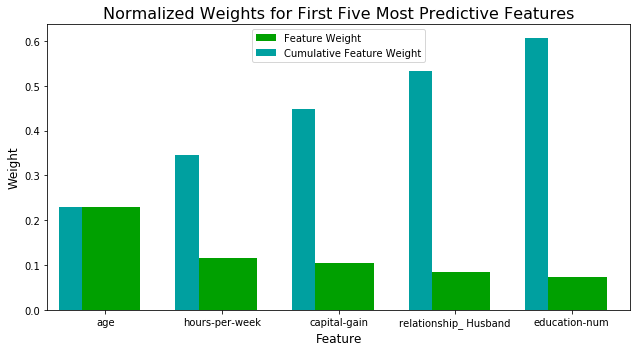

In [11]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state = 55)
model = model.fit(X = X_train, y = y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**_How do these five features compare to the five features you discussed in Question 6?_**

Of the 5 variables I initally selected 1 was identified by the model as being within the 5 most influential features:
- Age (Ranking also correct)

General comments:

**Age** being the most influential predictor confirms my initial estimate.

**Hours per week** makes sense as an important factor as one could argue that the more hours someone works, the more hours they are being paid for. This has flaws however as not everyone who has to work a large number of hours is adequately paid to reflect this labour, nor are overtime rates always available or generous (probably subject to national law and corporate policy).

**Capital gain** is something I am struggling to justify its importantance. My interpretation of capital gain is the increase in value of held assets, e.g. house or car. Holding such assets may not always be due to a high income as they can also be gifted and inherited. However if things like rent or investing gains or included in this feature and/or overall income it would make sense as to why it is important.

**Relationship_Husband** - This to me is a proxy for marital_status = Married, without falling victim to confirmation bias, I do belive my initial estimation and justification for importance has been identified by the model. To add, the model seems to suggest that being a husband is related to having a higher income. This may have been true in the past, however may become less relevant in the future as the gender pay gap is reduced in certain industries.

I do not fully understand the nature of **education-num**, however if it is related to the level of education rather than the duration of education or number of qualifications held I can understand why it has prevailed as important in the model.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [14]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8422
F-score on testing data: 0.6843

Final Model trained on reduced data
------
Accuracy on testing data: 0.8220
F-score on testing data: 0.6376


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

As seen in the table below the reduced data model actually performs slightly worse than the original full feature model. This could mean that there is something in the relationship between the final set of features in the reduced model and those excluded that introduces more predictive power than noise. Further exploration in feature engineering and selection should be able to identify this.

|     Metric     | Reduced Data Model | Optimized Model |    Difference   | 
| :------------: | :---------------:  | :-------------: | :-------------: |
| Accuracy Score |     0.8220         |    0.8422       |     0.0202      |
| F-score        |     0.6376         |    0.6843       |     0.0467      |

Training time was not a factor for the model chosen, however to ensure a future focused delivery when operationalising the model a case could be made to use the reduced feature model in an attempt to increase the training time of the model as more and more collected data is included at the training phase, granted prediction accuracy does not begin to drift.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

##Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [15]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 550805 bytes to finding_donors.html']